In [1]:
from tensorflow import keras
from tensorflow.keras.layers import (
    Input,Conv2D, Dense, MaxPooling2D, AveragePooling2D, ReLU,  Flatten
)
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(train_images,train_labels),(test_images,test_labels)=keras.datasets.mnist.load_data()

3


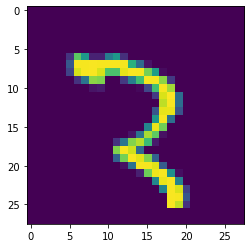

In [3]:
idx=500
plt.imshow(train_images[idx])
print(train_labels[idx])

In [4]:
input= Input(shape=(28,28,1)) #Input layer
hidden = Flatten()(input)
hidden = Dense(128, activation='relu')(hidden)
output = Dense(10, activation='softmax')(hidden)
model1 = Model(inputs=(input), outputs=output)

In [5]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model1.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
EPOCHS=5
BATCH_SIZE=64
H=model1.fit(x=train_images,y=train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(test_images,test_labels))

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 2.4675 - accuracy: 0.7514 - val_loss: 0.7421 - val_accuracy: 0.8332
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 1.0056 - accuracy: 0.7427 - val_loss: 1.1346 - val_accuracy: 0.6452
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 1.2614 - accuracy: 0.6227 - val_loss: 1.5249 - val_accuracy: 0.5579
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 1.6646 - accuracy: 0.4164 - val_loss: 1.8214 - val_accuracy: 0.3477
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 1.7783 - accuracy: 0.3510 - val_loss: 1.8997 - val_accuracy: 0.2763


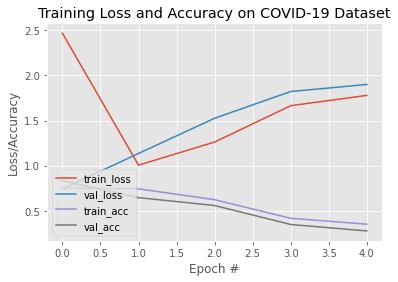

In [8]:
N = EPOCHS
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, N), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, N), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, N), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0, N), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy on COVID-19 Dataset')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')